<a href="https://colab.research.google.com/github/JJ-HMFIC/ML_Basic/blob/main/ML_Basic_Ch12_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12-5

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [ ]:
# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

In [ ]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

In [ ]:
# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

In [ ]:
# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [ ]:
# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [ ]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]] -> [0.14877846]
[[0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]] -> [0.12107173]
[[0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -

In [ ]:
print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations)

(505, 7, 5)
(505, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1)                 28        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
16/16 [==============================] - 4s 7ms/step - loss: 0.1447
Epoch 2/500
16/16 [==============================] - 0s 6ms/step - loss: 0.1292
Epoch 3/500
16/16 [==============================] - 0s 6ms/step - loss: 0.1157
Epoch 4/500
16/16 [==============================] - 0s 6ms/step - loss: 0.1041
Epoch 5/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0944
Epoch 6/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0861
Epoch 7/500
16/16 [==============================] - 0s 9ms/step - loss: 0.0790
Epoch 8/500
16/16 [==============================] - 0s 11ms/step - loss: 0.0732
Epoch 9/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 10/500
16/16 [==============================] - 0s 8ms/step - loss: 0.0635
Epoch 11/500
16/16 [==============================] - 0s 9ms/step - loss: 0.0593
Epoch 12/500
16/16 [==============================] - 0s 8ms/step - loss: 0.0554
Epoch 13/500
16/16 [===============

7/7 [==============================] - 1s 3ms/step


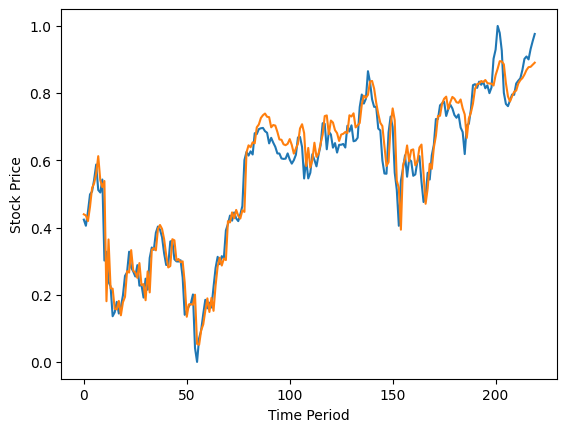

In [ ]:
# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()